# 机器学习作业 1 - 线性回归

## 1.单变量线性回归

导入需要使用的包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

导入数据集。提醒大家：一定要把数据文件ex1data1.txt放在和程序同一个文件夹里，否则需要使用绝对路径访问文件

In [2]:
path =  'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()  #预览数据

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


数据可视化，绘制散点图

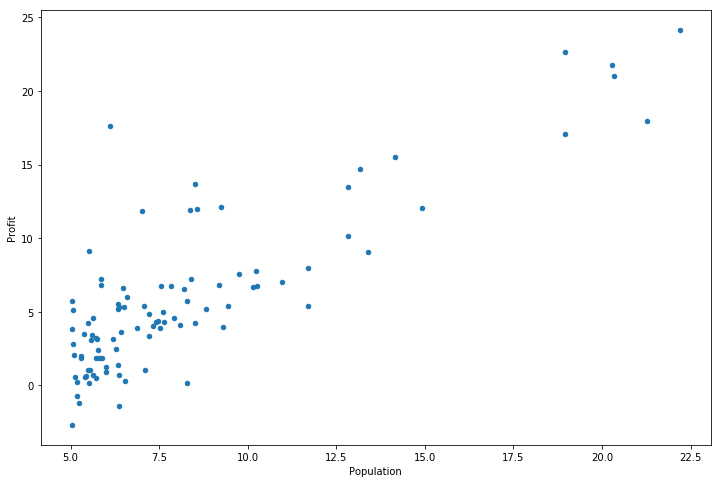

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

现在让我们使用梯度下降来实现线性回归，以最小化成本函数。 以下代码示例中实现的方程在“练习”文件夹中的“ex1.pdf”中有详细说明。

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [24]:
def computeCost(X, y, theta):
    # your code here  (appro ~ 2 lines)
    diff = np.matmul(X,theta)-y
    J = np.linalg.norm(diff)**2/len(y)/2
    return J

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [25]:
data.insert(0, 'Ones', 1)

现在我们来做一些变量初始化。

In [40]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]#X是所有行，最后一列

观察下 X (训练集) and y (目标变量)是否正确.

In [46]:
X.head()#head()是观察前5行

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

In [42]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化theta，即把theta所有元素都设置为0.

In [61]:
X_ = np.array(X.values)
y_ = np.array(y.values)
# your code here  (appro ~ 1 lines)
theta = np.zeros((cols-1,1))

theta 是一个(1,2)矩阵

In [62]:
theta

array([[0.],
       [0.]])

看下维度

In [71]:
X_.shape, theta.shape, y_.shape

((97, 2), (2, 1), (97, 1))

计算代价函数 (theta初始值为0).

In [78]:
computeCost(X_, y_, theta)
s = np.matmul(X_,theta)-y_
theta = np.random.randn(2,1)
theta


array([[-19.26965221,  -6.34558968],
       [ -6.51444236,  -2.14523738],
       [ -8.51630381,  -2.80446004],
       [ -8.29838135,  -2.73269712],
       [ -2.15216489,  -0.70871831],
       [ -5.86345378,  -1.93086369],
       [  4.79988158,   1.58062422],
       [ -5.69756029,  -1.87623416],
       [ -0.65655102,  -0.21620543],
       [  1.30163894,   0.428636  ],
       [  3.40516172,   1.12133623],
       [ -1.34632881,  -0.44335259],
       [  3.60557845,   1.18733443],
       [  1.78543994,   0.58795401],
       [  7.41638828,   2.44225253],
       [  2.38261805,   0.78460765],
       [  1.23663224,   0.40722898],
       [  6.74949357,   2.22264088],
       [  4.04916515,   1.33340967],
       [  2.37037248,   0.78057513],
       [  4.4528895 ,   1.46635805],
       [ -0.55546506,  -0.18291733],
       [  1.35841536,   0.44733275],
       [  1.35715774,   0.44691861],
       [  3.41919206,   1.12595648],
       [ -4.36499455,  -1.43741382],
       [ -0.4852426 ,  -0.15979273],
 

# 2.batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [143]:
theta = np.random.randn(2,1)
diff = np.matmul(X_,theta)-y_
k = sum(np.matmul(diff,theta.T))/len(y_)
k.reshape((2,1))
k.shape

(2,)

In [187]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.zeros(theta.shape)
    parameters = int(theta.ravel().shape[0])
    cost = np.zeros(iters)
    for i in range(iters):
        cost[i] = computeCost(X,y,theta)
        diff = np.matmul(X,theta)-y
        grad = np.matmul(X.T,diff)/len(y)
        grad = grad.reshape((X.shape[1],1))
        theta -= alpha*grad
        
        
    return theta, cost

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [188]:
theta = np.zeros((2,1))
alpha = 0.01
iters = 1000

现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。

In [189]:
g, cost = gradientDescent(X_, y_, theta, alpha, iters)
g,cost

(array([[-3.24140214],
        [ 1.1272942 ]]),
 array([32.07273388,  6.73719046,  5.93159357,  5.90115471,  5.89522859,
         5.89009494,  5.88500416,  5.87993248,  5.87487909,  5.86984391,
         5.86482687,  5.85982789,  5.85484692,  5.84988389,  5.84493874,
         5.8400114 ,  5.83510181,  5.8302099 ,  5.82533562,  5.82047889,
         5.81563965,  5.81081784,  5.8060134 ,  5.80122627,  5.79645638,
         5.79170367,  5.78696808,  5.78224955,  5.77754801,  5.77286341,
         5.76819568,  5.76354477,  5.75891061,  5.75429313,  5.7496923 ,
         5.74510803,  5.74054027,  5.73598897,  5.73145406,  5.72693549,
         5.72243319,  5.71794711,  5.71347718,  5.70902336,  5.70458558,
         5.70016379,  5.69575792,  5.69136792,  5.68699373,  5.6826353 ,
         5.67829257,  5.67396548,  5.66965398,  5.665358  ,  5.6610775 ,
         5.65681242,  5.6525627 ,  5.64832829,  5.64410913,  5.63990517,
         5.63571635,  5.63154261,  5.62738391,  5.6232402 ,  5.6191114 ,
   

最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [190]:
computeCost(X_, y_, g)

4.515955503078914

现在我们来绘制线性模型以及数据，直观地看出它的拟合。

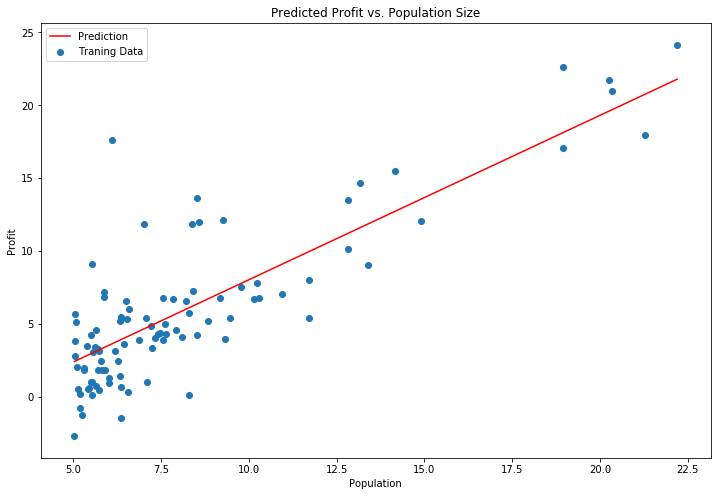

In [191]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0] + (g[1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

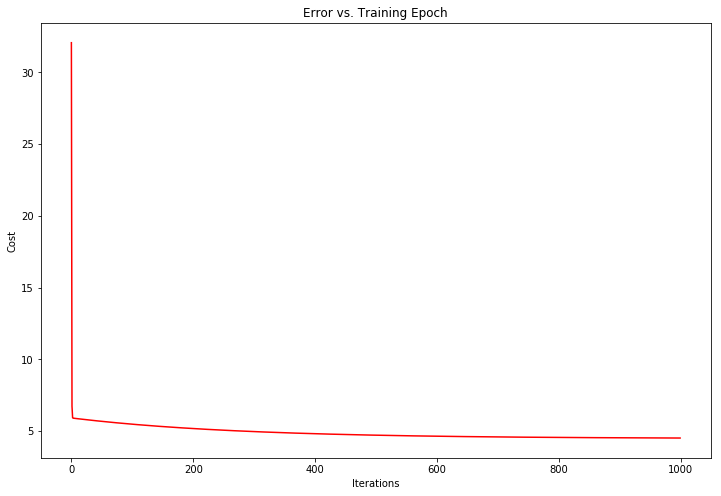

In [192]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 3.多变量线性回归

练习1还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [193]:
path =  'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对于此任务，我们添加了另一个预处理步骤 - 特征归一化。 这个对于pandas来说很简单

In [194]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。

In [201]:
# add ones column
# data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros((3,1))
print(theta2.shape)

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

(3, 1)


0.13070336960771892

我们也可以快速查看这一个的训练进程。

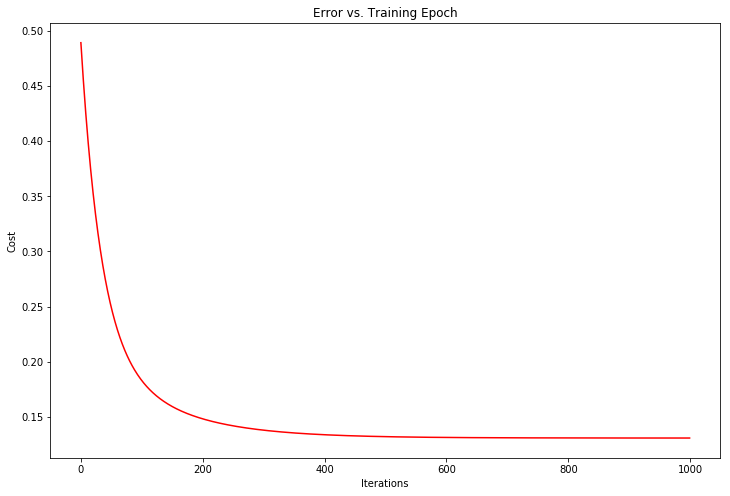

In [202]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# 4. normal equation（正规方程）(选做)
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [ ]:
# 正规方程
def normalEqn(X, y):
    # your code here  (appro ~ 1 lines)
    
    return theta

In [ ]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

In [ ]:
#梯度下降得到的结果是matrix([[-3.24140214,  1.1272942 ]])

在练习2中，我们将看看分类问题的逻辑回归。